<a href="https://colab.research.google.com/github/tallywiesenberg/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Wiesenberg_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
def plt_vector(x=1, y=1, z=0):
  '''plot vector of 2 or 3 dimensions'''
  if z == 0:
    #append array
    vector = np.array([[0, 0, x, y]])
    #separate origin from vectors
    plt.arrow(0, 0, x, y, head_width = 0.02, head_length = 0.01)
    plt.xlabel('X')
    plt.ylabel('Y')
  else:
    #append array
    vector = np.array([[0, 0 , 0, x, y, z]])
    #separate origin from vectors
    X, Y, Z, U, V, W = zip(*vector)
    #plot 3d axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #plot vector
    ax.quiver(X, Y, Z, U, V, W, length=1)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z') 
  return vector

(0, 4)

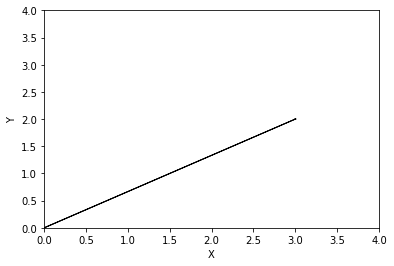

In [11]:
plt_vector(3, 2)
plt.xlim([0, 4])
plt.ylim([0, 4])

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
b = np.array([[17, -4, -2, 1]])

In [17]:
norm = np.linalg.norm(b)
norm

17.60681686165901

The norm represents the magnitude of the vector. It is a scalar value

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
c = np.array([[3, 7, -2, 12]])
d = np.array([[9, -7, 4, 6]])

In [22]:
np.dot(c, d.T)

array([[42]])

These vectors are not orthogonal because their dot product does not equal 0.

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [24]:
E = np.array([[7, 4, 2 ],
              [1, 3, -1],
              [2, 6, -4]])
print(E.T)
print(np.linalg.inv(E))

[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]
[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [25]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [0]:
def mean_std_variance(numlist):
  '''returns mean, standard dev,  and variance from numpy array'''
  mean = sum(numlist) / len(numlist)
  distance_squared = [(n - mean)**2 for n in numlist]
  variance = sum(distance_squared) / (len(numlist)-1)
  std = np.sqrt(variance)
  return mean, std, variance

In [34]:
mean, std, variance = mean_std_variance(df['customers'].to_numpy())
print('Number of Customers:', mean, std, variance)
mean, std, variance = mean_std_variance(df['snow'].to_numpy())
print('Inches of Snow:', mean, std, variance)

Number of Customers: 1135.7142857142858 314.26406851866597 98761.90476190478
Inches of Snow: 2.7142857142857144 2.9277002188455996 8.571428571428571


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

The variances of the two measures are not comparable because they are measured in contrasting orders of magnitude.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [38]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [49]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
print(df.shape)
df.head()

(4, 18)


,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
df1 = df.drop('Country', axis = 1)

In [52]:
#fit standard scale
scaler = StandardScaler().fit(df1) #exclude country attribute, for it is made of strings
#transform data
df_scaled = scaler.transform(df1)
df_scaled

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [57]:
#fit pca
pca = PCA(2).fit(df_scaled)
#print normalized eigenvalues
eigenvalues = pca.explained_variance_ratio_
print('Normalized Eigenvalues: \n', np.around(eigenvalues, decimals=2))

B = pca.transform(df_scaled)
B

Normalized Eigenvalues: 
 [0.68 0.25]


array([[-0.95448984,  0.32831832],
       [-4.52095094, -1.73537967],
       [ 0.48797835,  3.23367195],
       [ 4.98746242, -1.8266106 ]])

In [63]:
B[:, 1]

array([ 0.32831832, -1.73537967,  3.23367195, -1.8266106 ])

Text(0, 0.5, 'PC2')

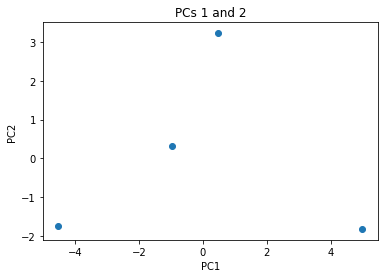

In [64]:
#plot PC 1 and 2
plt.scatter(B[:, 0], B[:, 1])
plt.title('PCs 1 and 2')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
df.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


Text(0, 0.5, 'y')

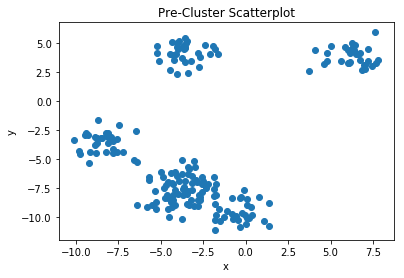

In [75]:
#plot non-clustered scatterplot
plt.scatter(df['x'], df['y'])
plt.title('Pre-Cluster Scatterplot')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])

In [0]:
def k_means_error(df, k_min, k_max):
  '''returns list of accuracies of k means cluster models using sum of squared distances error measurement
     given a dataframe and a range of number of k means
     includes creation and application of k-means model
     includes plot of accuracies over number of clusters intended for elbow method analysis'''
  errors = []                   #measure of error per number of clusters using sum of squared distances
  K = range(k_min, k_max)       #range of num of clusters
  #loop through num of clusters, find sum with least error
  for k in K:
    #create cluster model
    kmeans = KMeans(n_clusters=k)
    #fit model to transformed data
    kmeans = kmeans.fit(df)
    #append measure of error to list
    errors.append(kmeans.inertia_)
  plt.plot(K, errors)
  plt.title('Elbow Method Scree Plot', fontsize=14)
  plt.xlabel('Number of Clusters in Model')
  plt.ylabel('Error: Sum of Squared Distances')
  return errors

[10329.71582137223,
 3606.1200472616247,
 2004.7819673493188,
 691.0778792366671,
 374.3727785095325,
 304.5086056983297,
 265.48487725367966,
 247.15510286468762,
 224.60176883793397]

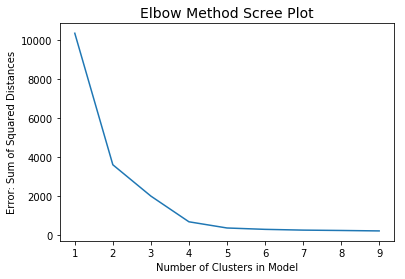

In [78]:
k_means_error(df, 1, 10)

In [79]:
#create cluster model
kmeans = KMeans(4)
#fit model to df
kmeans = kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = kmeans.labels_
df['cluster #'] = pd.Series(labels).values
df['cluster #']

Text(0, 0.5, 'Y')

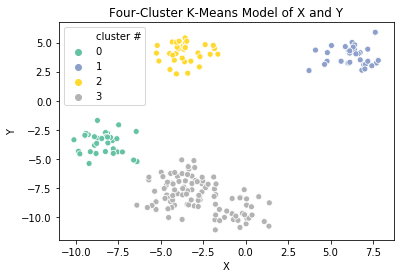

In [83]:
sns.scatterplot(x='x', y='y', hue='cluster #', palette = 'Set2', data= df)
plt.title('Four-Cluster K-Means Model of X and Y')
plt.xlabel('X')
plt.ylabel('Y')